![](ITD.png)
    
# Analisis de Datos Masivos
## Delitos San Francisco

## Nombre del Docente
## Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
## Jose Guadalupe Calderon Perez

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 

In [2]:
SF = pd.read_csv('Map-Crime_Incidents-Previous_Three_Months.csv')

In [3]:
SF.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
5,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,"(37.7896302267231, -122.405402610955)"
6,NaN,WARRANTS,WARRANT ARREST,Sunday,08/31/2014 07:00:00 AM +0000,18:51,RICHMOND,"ARREST, BOOKED",MARTIN LUTHER KING JR DR / 25TH AV,-122.482372,37.766770,"(37.7667702165662, -122.482372245817)"
7,NaN,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,"(37.7234534751554, -122.427016818213)"
8,NaN,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014 07:00:00 AM +0000,16:30,CENTRAL,NONE,100.0 Block of JACKSON ST,-122.398859,37.796984,"(37.7969838270893, -122.398859251506)"
9,NaN,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Sunday,08/31/2014 07:00:00 AM +0000,18:18,CENTRAL,NONE,300.0 Block of POWELL ST,-122.408334,37.787683,"(37.7876829825053, -122.40833353294)"


In [4]:
len(SF)

30760

In [5]:
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:4]))

In [6]:
SF.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,3
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,3
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,3
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,3
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,3
5,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,"(37.7896302267231, -122.405402610955)",8,3
6,NaN,WARRANTS,WARRANT ARREST,Sunday,08/31/2014 07:00:00 AM +0000,18:51,RICHMOND,"ARREST, BOOKED",MARTIN LUTHER KING JR DR / 25TH AV,-122.482372,37.766770,"(37.7667702165662, -122.482372245817)",8,3
7,NaN,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,"(37.7234534751554, -122.427016818213)",8,3
8,NaN,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014 07:00:00 AM +0000,16:30,CENTRAL,NONE,100.0 Block of JACKSON ST,-122.398859,37.796984,"(37.7969838270893, -122.398859251506)",8,3
9,NaN,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Sunday,08/31/2014 07:00:00 AM +0000,18:18,CENTRAL,NONE,300.0 Block of POWELL ST,-122.408334,37.787683,"(37.7876829825053, -122.40833353294)",8,3


In [7]:
del SF['IncidntNum']

In [8]:
SF.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,3
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,3
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,3
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,3


In [9]:
contarCategorias = SF['PdDistrict'].value_counts()
contarCategorias.head(10)

SOUTHERN      6185
MISSION       4011
CENTRAL       3867
NORTHERN      3205
BAYVIEW       2970
INGLESIDE     2613
TENDERLOIN    2449
TARAVAL       2038
PARK          1800
RICHMOND      1622
Name: PdDistrict, dtype: int64

**Pregunta de desafio:** ¿Qué PdDistrict presentaba la mayoría de los incidentes de delitos informados? Proporcione los comandos de Python

In [10]:
contarCategorias = SF['PdDistrict'].value_counts()
contarCategorias.head(1)

SOUTHERN    6185
Name: PdDistrict, dtype: int64

### Crear subconjuntos de datos y organizarlos en marcos de datos más pequeños

In [11]:
crimenesAgosto = SF[SF['Month'] == 8]
crimenesAgosto.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,3
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,3
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,3
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,3


¿Cuántos incidentes de delitos hubo en agosto?

In [12]:
len(crimenesAgosto)

9720

¿Cuántos robos se informaron en agosto?

In [13]:
robosAgosto = crimenesAgosto[(crimenesAgosto['Category'] == 'LARCENY/THEFT') |
                                  (crimenesAgosto['Category'] == 'VEHICLE THEFT')].dropna()
robosAgosto.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,3
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,3
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,3
5,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,"(37.7896302267231, -122.405402610955)",8,3
7,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,"(37.7234534751554, -122.427016818213)",8,3


In [14]:
Crimenes0105 = SF.query('Month == 8 and Day == 3')
Crimenes0105.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,3
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,3
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,3
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,WARRANTS,WARRANT ARREST,Saturday,08/30/2014 07:00:00 AM +0000,15:00,CENTRAL,"ARREST, BOOKED",2800.0 Block of TAYLOR ST,-122.415887,37.808951,"(37.8089513016416, -122.415887451278)",8,3
103,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Saturday,08/30/2014 07:00:00 AM +0000,15:00,CENTRAL,"ARREST, BOOKED",2800.0 Block of TAYLOR ST,-122.415887,37.808951,"(37.8089513016416, -122.415887451278)",8,3
104,LARCENY/THEFT,GRAND THEFT BICYCLE,Saturday,08/30/2014 07:00:00 AM +0000,15:00,MISSION,NONE,300.0 Block of HILL ST,-122.428765,37.755522,"(37.7555222254412, -122.428765343716)",8,3
105,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,08/30/2014 07:00:00 AM +0000,16:30,INGLESIDE,NONE,3300.0 Block of MISSION ST,-122.421607,37.743011,"(37.743011479548, -122.421607115588)",8,3


### Graficar Datos

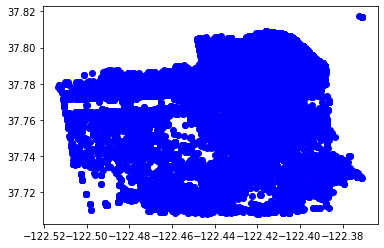

In [15]:
plt.plot(SF['X'],SF['Y'], 'bo')
plt.show()

In [16]:
distritos = np.unique(SF['PdDistrict'])
Niveles_Distritos = dict(zip(distritos, range(len(distritos))))
Niveles_Distritos

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [17]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: Niveles_Distritos[row])

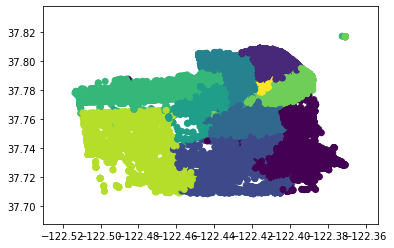

In [18]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])

### Trazar Grafico en mapa

In [21]:
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [22]:
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))  
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [31]:
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip( SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=8).add_to(map_osm)

map_osm

![](Map_DelitosSF.jpg)